<a href="https://colab.research.google.com/github/bernardooduarte/gestao-projetos-machine-learning/blob/main/C%C3%B3pia_de_03_Machine_Learning_Parte_1_Classificac%CC%A7a%CC%83o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lendo as bases de dados

In [3]:
from google.colab import drive

# Permite acesso aos arquivos
drive.mount('/content/drive', force_remount=True)

# Caminho da pasta que contém as bases de dados.
# É necessário que o arquivo esteja em seu drive, ou crie um atalho da parta compartilhada no seu drive
drive_path = "/content/drive/MyDrive/Gestão de projetos em IA - Translator 5 - Aprofundamentos em Machine Learning/bases/"

Mounted at /content/drive


In [4]:
base_cadastral = pd.read_csv(drive_path + 'base_cadastral.csv')

In [5]:
base_pagamentos = pd.read_csv(drive_path + 'base_pagamentos.csv')

In [6]:
base_info = pd.read_csv(drive_path + 'base_info.csv')

# Entendimento das bases de dados

## Base Cadastral

In [7]:
base_cadastral.head()

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62


A base cadastral tem 1315 linhas e 8 colunas, representando registros de cadastros de clientes. Cada linha deve ser um cliente (temos que checar) e seria interessante também entendermos a volumetria de clientes por mês e pelos segmentos existentes (SEGMENTO_INDUSTRIAL, DOMINIO_EMAIL, PORTE, CEP). Antes de avançarmos, vale verificarmos os tipos das variáveis e corrigir já qualquer tipo de erro na identificação dos tipos.

In [8]:
base_cadastral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_CLIENTE           1315 non-null   int64 
 1   DATA_CADASTRO        1315 non-null   object
 2   DDD                  1078 non-null   object
 3   FLAG_PF              66 non-null     object
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object
 5   DOMINIO_EMAIL        1285 non-null   object
 6   PORTE                1274 non-null   object
 7   CEP_2_DIG            1315 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.3+ KB


Vamos corrigir o tipo da coluna `DATA_CADASTRO`, que deve ser do tipo Data.

In [9]:
base_cadastral['DATA_CADASTRO'] = pd.to_datetime(base_cadastral['DATA_CADASTRO'])

In [10]:
base_cadastral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_CLIENTE           1315 non-null   int64         
 1   DATA_CADASTRO        1315 non-null   datetime64[ns]
 2   DDD                  1078 non-null   object        
 3   FLAG_PF              66 non-null     object        
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object        
 5   DOMINIO_EMAIL        1285 non-null   object        
 6   PORTE                1274 non-null   object        
 7   CEP_2_DIG            1315 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 82.3+ KB


### Verificando duplicidade na coluna `ID_CLIENTE`

In [11]:
base_cadastral['ID_CLIENTE'].nunique()

1315

A quantidade de clientes únicos é igual a quantidade de registros na base, logo não há clientes duplicados (o que faz sentido para uma base cadastral).

Vamos agora verificar a quantidade de clientes cadastros por mês. Para isso vamos criar uma variável que representa o mês de cadastro.

In [12]:
base_cadastral['DATA_CADASTRO_ANOMES'] = base_cadastral['DATA_CADASTRO'].dt.to_period('M')
base_cadastral.head()

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DATA_CADASTRO_ANOMES
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,2013-08
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77,2017-01
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48,2000-08
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89,2017-08
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02


### Cadastros por mês

<Axes: xlabel='DATA_CADASTRO_ANOMES'>

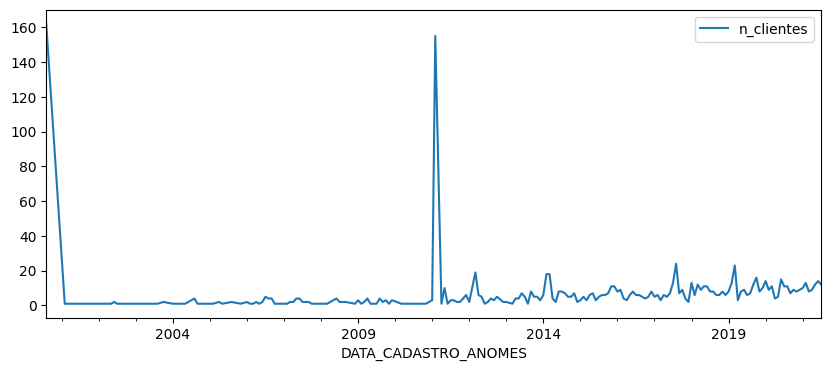

In [13]:
base_cadastral.groupby('DATA_CADASTRO_ANOMES').agg(n_clientes = ('ID_CLIENTE', 'count')).plot(figsize=(10,4))

Tivemos picos de cadastro de clientes no primeiro mês de existência da plataforma (boom de novos usuários), e outro pico de cadastro em janeiro de 2011 (possivelmente devido a alguma ação de marketing).

### Clientes por Segmento Industrial e Porte

In [14]:
base_cadastral['SEGMENTO_INDUSTRIAL'].value_counts(normalize=True)

,proportion
SEGMENTO_INDUSTRIAL,
Serviços,0.408279
Comércio,0.349838
Indústria,0.241883


A maior parte dos clientes (41%) são provenientes do setor de serviços.

<Axes: xlabel='SEGMENTO_INDUSTRIAL'>

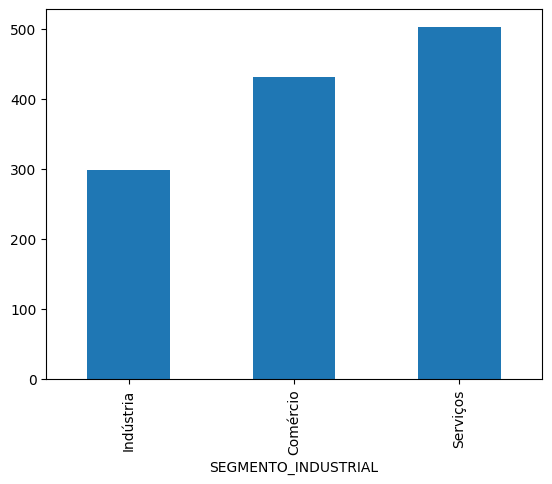

In [15]:
base_cadastral['SEGMENTO_INDUSTRIAL'].value_counts().sort_values(ascending=True).plot(kind='bar')

In [16]:
base_cadastral['PORTE'].value_counts(normalize=True)

,proportion
PORTE,
MEDIO,0.409733
GRANDE,0.376766
PEQUENO,0.213501


A maior parte dos clientes (41%) dos clientes são de médio porte.

In [17]:
pd.crosstab(
    index=base_cadastral['SEGMENTO_INDUSTRIAL'],
    columns=base_cadastral['PORTE'],
    normalize='index'
).round(2)

PORTE,GRANDE,MEDIO,PEQUENO
SEGMENTO_INDUSTRIAL,,,
Comércio,0.41,0.39,0.20
Indústria,0.33,0.46,0.21
Serviços,0.37,0.40,0.23


No maior segmento (serviços), a maior parte dos clientes são de médio e grande porte, respectivamente.

## Base Pagamentos

In [18]:
base_pagamentos.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99


Nessa base, cada linha representa um pagamento realizado por um cliente em um mês específico. Por exemplo, o cliente `6456490958004500912` realizou 6 pagamentos entre os meses de agosto de 2018 a janeiro de 2021. O pagamento com data de vencimento no dia 07 de abril de 2020 foi pago em atraso, no dia 30 de junho de 2020.

In [19]:
base_pagamentos[base_pagamentos.ID_CLIENTE == 6456490958004500912].sort_values(by='DATA_PAGAMENTO')

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
1790,6456490958004500912,2018-08,2018-08-31,2018-09-18,2018-09-18,28203.5,5.99
32777,6456490958004500912,2019-10,2019-10-29,2019-11-19,2019-11-19,28005.0,5.99
35534,6456490958004500912,2019-12,2019-12-04,2019-12-24,2019-12-24,28823.0,5.99
43307,6456490958004500912,2020-03,2020-03-20,2020-04-30,2020-04-07,23225.6,8.99
54784,6456490958004500912,2020-09,2020-09-10,2020-10-06,2020-10-06,25481.0,8.99
65563,6456490958004500912,2021-01,2021-01-20,2021-02-17,2021-02-17,29355.0,4.99


In [20]:
base_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           77414 non-null  float64
 6   TAXA                    77414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB


### Correção de Tipos

Vamos corrigir os tipos das colunas que representam datas.

In [21]:
base_pagamentos['SAFRA_REF'] = pd.to_datetime(base_pagamentos.SAFRA_REF).dt.to_period('M')
base_pagamentos['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(base_pagamentos.DATA_EMISSAO_DOCUMENTO)
base_pagamentos['DATA_PAGAMENTO'] = pd.to_datetime(base_pagamentos.DATA_PAGAMENTO)
base_pagamentos['DATA_VENCIMENTO'] = pd.to_datetime(base_pagamentos.DATA_VENCIMENTO)

In [22]:
base_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              77414 non-null  int64         
 1   SAFRA_REF               77414 non-null  period[M]     
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  datetime64[ns]
 3   DATA_PAGAMENTO          77414 non-null  datetime64[ns]
 4   DATA_VENCIMENTO         77414 non-null  datetime64[ns]
 5   VALOR_A_PAGAR           77414 non-null  float64       
 6   TAXA                    77414 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(1), period[M](1)
memory usage: 4.1 MB


### Pagamentos Atrasados

Vamos fazer uma rápida análise para entender a quantidade de pagamentos realizados em atraso.

In [23]:
(
    base_pagamentos
    .assign(
        diff = lambda df_: (df_.DATA_PAGAMENTO - df_.DATA_VENCIMENTO).dt.days,
        atraso = lambda df_: np.where(df_['diff'] > 30, 1, 0)
    )
    ['atraso']
    .mean()
)

np.float64(0.009068127212132172)

11% dos pagamentos foram realizados em atraso. Vale lembrar que nem todos significam uma inadimplência de fato, pois atrasos de alguns poucos dias não costumam serem levados em conta para definição de inadimplência.

## Base Info

In [24]:
base_info.head()

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,92.0
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0
3,1003144834589372198,2018-09,239659.0,96.0
4,324916756972236008,2018-09,203123.0,103.0


Essa base é bem simples e contém, para cada cliente, informações relativas há um mês específico, uma espécie de fotografia.

In [25]:
base_info[base_info.ID_CLIENTE == 6456490958004500912].sort_values(by='SAFRA_REF')

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
421,6456490958004500912,2018-09,699494.0,101.0
8417,6456490958004500912,2019-11,371547.0,100.0
9114,6456490958004500912,2019-12,433153.0,97.0
11151,6456490958004500912,2020-04,447713.0,112.0
14553,6456490958004500912,2020-09,171781.0,112.0
17418,6456490958004500912,2021-02,698784.0,115.0
21847,6456490958004500912,2021-08,466015.0,111.0


O cliente `6456490958004500912` em dezembro de 2019, apresentou uma renda no mês de novembro de um pouco mais de 400 mil e um número de funcionários de 97.

### Correção de Tipos

In [26]:
base_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24401 entries, 0 to 24400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_CLIENTE          24401 non-null  int64  
 1   SAFRA_REF           24401 non-null  object 
 2   RENDA_MES_ANTERIOR  24401 non-null  float64
 3   NO_FUNCIONARIOS     24401 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 762.7+ KB


In [27]:
base_info['SAFRA_REF'] = pd.to_datetime(base_info.SAFRA_REF).dt.to_period('M')

In [28]:
base_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24401 entries, 0 to 24400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   ID_CLIENTE          24401 non-null  int64    
 1   SAFRA_REF           24401 non-null  period[M]
 2   RENDA_MES_ANTERIOR  24401 non-null  float64  
 3   NO_FUNCIONARIOS     24401 non-null  float64  
dtypes: float64(2), int64(1), period[M](1)
memory usage: 762.7 KB


# Junção das Bases

Vamos cruzar as 3 bases e criarmos uma única base.

Vamos começar trazendo as informações cadastrais para a base de pagamentos utilizando a coluna chave `ID_CLIENTE`.

Em seguida, vamos trazer as informações da base de informações (`base_info`) para a base resultante do cruzamento anterior através das chaves `ID_CLIENTE` e `SAFRA_REF`.


In [30]:
base_completa = (
    base_pagamentos
    .merge(base_cadastral, on=['ID_CLIENTE'])
    .merge(base_info, on=['ID_CLIENTE', 'SAFRA_REF'])
)

In [31]:
base_completa.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DATA_CADASTRO_ANOMES,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,324916756972236008,2018-09,2018-09-02,2018-09-19,2018-09-19,21499.85,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0
1,324916756972236008,2018-09,2018-09-03,2018-09-19,2018-09-19,17690.72,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0
2,324916756972236008,2018-09,2018-09-13,2018-10-01,2018-10-01,17240.90,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0
3,324916756972236008,2018-09,2018-09-14,2018-10-01,2018-10-01,21474.50,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0
4,4679462479444735708,2018-09,2018-09-07,2018-09-24,2018-09-24,17354.30,8.99,2000-08-15,18,NaN,Indústria,HOTMAIL,GRANDE,19,2000-08,53021.0,120.0


### Verificando duplicidade após o join

In [32]:
base_completa.loc[base_completa.duplicated(subset=['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO',
                                                   'DATA_VENCIMENTO', 'VALOR_A_PAGAR'])]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DATA_CADASTRO_ANOMES,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
1518,8350724667410677464,2018-09,2018-09-17,2018-10-05,2018-10-08,21469.21,4.99,2011-05-30,85,NaN,Serviços,YAHOO,GRANDE,61,2011-05,378706.0,112.0
1962,1276604410881911401,2018-10,2018-10-15,2018-11-14,2018-11-28,151974.24,8.99,2000-08-15,67,NaN,Indústria,YAHOO,PEQUENO,38,2000-08,230386.0,83.0
3815,3977861004707764824,2018-11,2018-11-11,2018-12-27,2018-11-27,11132.06,5.99,2011-02-14,44,NaN,Serviços,GMAIL,GRANDE,87,2011-02,339356.0,108.0
6325,8350724667410677464,2018-12,2018-12-04,2018-12-21,2018-12-24,16127.69,11.99,2011-05-30,85,NaN,Serviços,YAHOO,GRANDE,61,2011-05,300020.0,112.0
8919,4524147234488547993,2019-01,2019-01-08,2019-01-23,2019-01-24,37180.60,8.99,2017-03-09,61,NaN,Comércio,HOTMAIL,GRANDE,70,2017-03,320723.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70209,5888474320320735000,2021-05,2021-05-17,2021-07-06,2021-07-01,54333.00,6.99,2014-12-22,95,NaN,Indústria,GMAIL,GRANDE,65,2014-12,212188.0,102.0
70215,5888474320320735000,2021-05,2021-05-26,2021-07-20,2021-07-12,54333.00,6.99,2014-12-22,95,NaN,Indústria,GMAIL,GRANDE,65,2014-12,212188.0,102.0
70755,8529899700094903171,2021-06,2021-06-02,2021-06-23,2021-06-24,62025.00,5.99,2000-08-15,32,NaN,Comércio,GMAIL,GRANDE,36,2000-08,872235.0,129.0
70758,8529899700094903171,2021-06,2021-06-06,2021-06-25,2021-06-28,61866.50,5.99,2000-08-15,32,NaN,Comércio,GMAIL,GRANDE,36,2000-08,872235.0,129.0


Apenas 90 linhas são duplicadas. No nosso contexto de negócio, é possível que um cliente tenha emitido duas nota iguais no mesmo dia e pagados ambas também no mesmo dia. Dessa forma, vamos deixar essas linhas duplicadas.

### Checagem de Valores Nulos

In [34]:
(base_completa.isnull().sum() / len(base_completa)).sort_values(ascending=False)

,0
FLAG_PF,0.997877
DDD,0.093948
PORTE,0.032187
SEGMENTO_INDUSTRIAL,0.017611
DOMINIO_EMAIL,0.011174
ID_CLIENTE,0.000000
SAFRA_REF,0.000000
DATA_PAGAMENTO,0.000000
DATA_EMISSAO_DOCUMENTO,0.000000
DATA_CADASTRO,0.000000


A coluna `FLAG_PF` possui quase todos os valores nulos. Após um entendimento com as pessoas responsáveis por esses dados, verificou-se que quando a FLAG_PF não é nula, significa que o cliente é pessoa física. Com esse entendimento, vamos filtrar esses clientes pessoas físicas e removê-los da base, pois queremos desenvolver um modelo para clientes pessoas jurídicas.

In [35]:
base_completa['FLAG_PF'].value_counts()

,count
FLAG_PF,
X,156


Apenas 156 clientes da base são pessoas físicas. Agora vamos removê-los.

In [36]:
base_completa = base_completa[base_completa['FLAG_PF'].isna()].copy()

In [37]:
base_completa.shape

(73321, 17)

# Construção de Novas Variáveis

## Renda por funcionários

In [38]:
base_completa['RAZAO_RENDA_FUNC'] = base_completa[['RENDA_MES_ANTERIOR',
                                                   'NO_FUNCIONARIOS']].apply(lambda df_: df_[0]/df_[1] if df_[1]> 0 else np.nan, axis=1)
base_completa

<ipython-input-38-4946140fc6f6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'NO_FUNCIONARIOS']].apply(lambda df_: df_[0]/df_[1] if df_[1]> 0 else np.nan, axis=1)


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DATA_CADASTRO_ANOMES,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,RAZAO_RENDA_FUNC
0,324916756972236008,2018-09,2018-09-02,2018-09-19,2018-09-19,21499.85,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961
1,324916756972236008,2018-09,2018-09-03,2018-09-19,2018-09-19,17690.72,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961
2,324916756972236008,2018-09,2018-09-13,2018-10-01,2018-10-01,17240.90,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961
3,324916756972236008,2018-09,2018-09-14,2018-10-01,2018-10-01,21474.50,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961
4,4679462479444735708,2018-09,2018-09-07,2018-09-24,2018-09-24,17354.30,8.99,2000-08-15,18,NaN,Indústria,HOTMAIL,GRANDE,19,2000-08,53021.0,120.0,441.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73472,4530631557358349711,2021-06,2021-06-30,2021-07-16,2021-07-16,63971.51,5.99,2000-08-15,11,NaN,Serviços,HOTMAIL,PEQUENO,55,2000-08,139142.0,116.0,1199.500000
73473,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,2000-08-15,11,NaN,Comércio,AOL,PEQUENO,13,2000-08,280343.0,161.0,1741.260870
73474,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,2021-04-08,19,NaN,Indústria,GMAIL,GRANDE,25,2021-04,235315.0,87.0,2704.770115
73475,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,2011-02-15,91,NaN,Serviços,HOTMAIL,GRANDE,67,2011-02,100006.0,126.0,793.698413


## Valor da Taxa

In [39]:
base_completa['VL_TAXA'] = base_completa[['TAXA', 'VALOR_A_PAGAR']].apply(lambda df_: (df_[0] / 100) * df_[1] if df_[1]> 0 else np.nan, axis=1)
base_completa

<ipython-input-39-f9f1857657a8>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  base_completa['VL_TAXA'] = base_completa[['TAXA', 'VALOR_A_PAGAR']].apply(lambda df_: (df_[0] / 100) * df_[1] if df_[1]> 0 else np.nan, axis=1)


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DATA_CADASTRO_ANOMES,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,RAZAO_RENDA_FUNC,VL_TAXA
0,324916756972236008,2018-09,2018-09-02,2018-09-19,2018-09-19,21499.85,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961,1287.841015
1,324916756972236008,2018-09,2018-09-03,2018-09-19,2018-09-19,17690.72,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961,1059.674128
2,324916756972236008,2018-09,2018-09-13,2018-10-01,2018-10-01,17240.90,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961,1032.729910
3,324916756972236008,2018-09,2018-09-14,2018-10-01,2018-10-01,21474.50,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,2011-02,203123.0,103.0,1972.067961,1286.322550
4,4679462479444735708,2018-09,2018-09-07,2018-09-24,2018-09-24,17354.30,8.99,2000-08-15,18,NaN,Indústria,HOTMAIL,GRANDE,19,2000-08,53021.0,120.0,441.841667,1560.151570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73472,4530631557358349711,2021-06,2021-06-30,2021-07-16,2021-07-16,63971.51,5.99,2000-08-15,11,NaN,Serviços,HOTMAIL,PEQUENO,55,2000-08,139142.0,116.0,1199.500000,3831.893449
73473,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,2000-08-15,11,NaN,Comércio,AOL,PEQUENO,13,2000-08,280343.0,161.0,1741.260870,5389.802000
73474,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,2021-04-08,19,NaN,Indústria,GMAIL,GRANDE,25,2021-04,235315.0,87.0,2704.770115,2530.116100
73475,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,2011-02-15,91,NaN,Serviços,HOTMAIL,GRANDE,67,2011-02,100006.0,126.0,793.698413,1253.197850


# Ajustes de Variáveis

## DDD

In [ ]:
base_completa['DDD'].unique()

array(['99', '31', '75', '49', '88', '18', '67', '21', '11', '44', nan,
       '19', '14', '85', '41', '51', '12', '62', '43', '91', '42', '61',
       '33', '48', '71', '65', '38', '24', '(3', '47', '28', '(2', '81',
       '35', '13', '86', '94', '45', '17', '16', '55', '64', '69', '32',
       '(6', '27', '66', '63', '46', '(1', '54', '77', '34', '74', '37',
       '53', '56', '95', '22', '73', '(9', '(4', '52', '87', '98', '(8',
       '92', '82', '79', '93', '83', '00', '(5', '15', '02', '84', '(0',
       '04', '07'], dtype=object)

Alguns números não fazem sentido, como `(1` e `(8`, por exemplo. Provavelmente foi erro de digitação. Para nos ajudar nessa tarefa, vamos criar uma função chamda `check_2dig` que checa se o DDD possui dois dígitos. Caso não possua dois dígitos, assume que é um valor digitado errado e substitui por um valor nulo `np.nan`.

In [ ]:
import re

def check_2dig(x: str):
  if x and re.match(r"^[0-9]{2}$", x):
    return x
  else:
    return np.nan

In [ ]:
base_completa['DDD'] = base_completa['DDD'].astype(str).apply(check_2dig)

In [ ]:
base_completa['DDD'].unique()

array(['99', '31', '75', '49', '88', '18', '67', '21', '11', '44', nan,
       '19', '14', '85', '41', '51', '12', '62', '43', '91', '42', '61',
       '33', '48', '71', '65', '38', '24', '47', '28', '81', '35', '13',
       '86', '94', '45', '17', '16', '55', '64', '69', '32', '27', '66',
       '63', '46', '54', '77', '34', '74', '37', '53', '56', '95', '22',
       '73', '52', '87', '98', '92', '82', '79', '93', '83', '00', '15',
       '02', '84', '04', '07'], dtype=object)

In [ ]:
base_completa.DDD.isnull().sum()/base_completa.shape[0]

0.11336452039661216

## Segmento Industrial

In [ ]:
base_completa['SEGMENTO_INDUSTRIAL'].unique()

array(['Serviços', 'Comércio', 'Indústria', nan], dtype=object)

In [ ]:
base_completa['SEGMENTO_INDUSTRIAL'] = base_completa['SEGMENTO_INDUSTRIAL'].astype(str).map({'Serviços':'SERVICOS', 'Comércio':'COMERCIO', 'Indústria':'INDUSTRIA'})

In [ ]:
base_completa['SEGMENTO_INDUSTRIAL'].unique()

array(['SERVICOS', 'COMERCIO', 'INDUSTRIA', nan], dtype=object)

## Domínio Email

In [ ]:
base_completa['DOMINIO_EMAIL'].unique()

array(['YAHOO', 'HOTMAIL', 'OUTLOOK', 'GMAIL', 'BOL', 'AOL', nan],
      dtype=object)

In [ ]:
base_completa['DOMINIO_EMAIL'] = base_completa['DOMINIO_EMAIL'].astype(str).map({'YAHOO':'YAHOO', 'HOTMAIL':'HOTMAIL', 'OUTLOOK':'OUTLOOK', 'GMAIL':'GMAIL', 'BOL':'BOL', 'AOL':'AOL'})

In [ ]:
base_completa['DOMINIO_EMAIL'].unique()

array(['YAHOO', 'HOTMAIL', 'OUTLOOK', 'GMAIL', 'BOL', 'AOL', nan],
      dtype=object)

## Porte

In [ ]:
base_completa['PORTE'].unique()

array(['PEQUENO', 'MEDIO', 'GRANDE', nan], dtype=object)

In [ ]:
base_completa['PORTE'] = base_completa['PORTE'].astype(str).map({'PEQUENO':'PEQUENO', 'MEDIO':'MEDIO', 'GRANDE':'GRANDE'})

In [ ]:
base_completa['DOMINIO_EMAIL'].unique()

array(['YAHOO', 'HOTMAIL', 'OUTLOOK', 'GMAIL', 'BOL', 'AOL', nan],
      dtype=object)

## CEP

In [ ]:
base_completa['CEP_2_DIG'].unique()

array(['65', '77', '48', '89', '62', '19', '38', '26', '55', '87', '37',
       '22', '13', '18', '21', '98', '60', '82', '92', '79', '12', '27',
       '76', '67', '72', '68', '11', '84', '70', '83', '88', '75', '36',
       '45', '44', '16', '42', '78', '31', '41', '35', '51', '30', '86',
       '25', '29', '17', '23', '20', '93', '64', '95', '85', '15', '14',
       '99', '80', '24', '61', '90', '50', '96', '97', '57', '46', '47',
       '32', '54', '91', '56', '28', '71', '33', '94', '58', '34', '59',
       '69', '40', '74', '49', '43', '66', '39', '73', '81', '53', '52',
       '63', 'na'], dtype=object)

In [ ]:
base_completa['CEP_2_DIG'] = base_completa['CEP_2_DIG'].apply(check_2dig)

In [ ]:
base_completa['CEP_2_DIG'].unique()

array(['65', '77', '48', '89', '62', '19', '38', '26', '55', '87', '37',
       '22', '13', '18', '21', '98', '60', '82', '92', '79', '12', '27',
       '76', '67', '72', '68', '11', '84', '70', '83', '88', '75', '36',
       '45', '44', '16', '42', '78', '31', '41', '35', '51', '30', '86',
       '25', '29', '17', '23', '20', '93', '64', '95', '85', '15', '14',
       '99', '80', '24', '61', '90', '50', '96', '97', '57', '46', '47',
       '32', '54', '91', '56', '28', '71', '33', '94', '58', '34', '59',
       '69', '40', '74', '49', '43', '66', '39', '73', '81', '53', '52',
       '63', nan], dtype=object)

# Construção da Variável Target

Um cliente será considerado `MAU` (inadimplente) quando apresentar um atraso igual ou superior a 5 dias.

Vamos fazer em duas etapas:

1. Calculamos a diferença em dias entre a data de pagamento e a data de vencimento
2. Caso a quantidade de dias em atraso seja maior ou igual a 5, iremos marcar como inadimplente (`FLAG_MAU`).

In [ ]:
base_completa['DIAS_DE_ATRASO'] = (base_completa['DATA_PAGAMENTO'] - base_completa['DATA_VENCIMENTO']).dt.days

In [ ]:
base_completa['FLAG_MAU'] = (base_completa['DIAS_DE_ATRASO']>=5).astype(int)

In [ ]:
base_completa

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,...,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DATA_CADASTRO_ANOMES,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,RAZAO_RENDA_FUNC,VL_TAXA,DIAS_DE_ATRASO,FLAG_MAU
0,1661240395903230676,2018-09,2018-09-16,2018-10-09,2018-10-08,22427.25,5.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,16913.0,92.0,183.836957,1343.392275,1,0
1,1661240395903230676,2018-09,2018-09-23,2018-10-15,2018-10-15,35608.11,5.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,16913.0,92.0,183.836957,2132.925789,0,0
2,1661240395903230676,2018-10,2018-10-08,2018-10-30,2018-10-29,17988.49,5.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,236447.0,93.0,2542.440860,1077.510551,1,0
3,1661240395903230676,2018-10,2018-10-17,2018-11-07,2018-11-06,41998.20,6.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,236447.0,93.0,2542.440860,2935.674180,1,0
4,1661240395903230676,2018-10,2018-10-21,2018-11-12,2018-11-12,35514.41,6.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,236447.0,93.0,2542.440860,2482.457259,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73472,3148228961195376491,2021-06,2021-06-13,2021-07-26,2021-07-28,17302.05,4.99,2015-12-13,NaN,NaN,...,BOL,MEDIO,36,2015-12,343507.0,134.0,2563.485075,863.372295,-2,0
73473,2439954154030259398,2021-06,2021-06-14,2021-06-28,2021-06-29,19799.30,6.99,2019-07-02,NaN,NaN,...,BOL,PEQUENO,13,2019-07,392975.0,121.0,3247.727273,1383.971070,-1,0
73474,2439954154030259398,2021-06,2021-06-17,2021-07-01,2021-07-02,19913.15,11.99,2019-07-02,NaN,NaN,...,BOL,PEQUENO,13,2019-07,392975.0,121.0,3247.727273,2387.586685,-1,0
73475,4799794458216343260,2021-06,2021-06-14,2021-07-13,2021-07-09,2806.09,6.99,2019-12-30,19,NaN,...,OUTLOOK,MEDIO,20,2019-12,70449.0,141.0,499.638298,196.145691,4,0


In [ ]:
base_completa['FLAG_MAU'].value_counts()

0    68237
1     5084
Name: FLAG_MAU, dtype: int64

In [ ]:
base_completa['FLAG_MAU'].value_counts(1)

0    0.930661
1    0.069339
Name: FLAG_MAU, dtype: float64

Temos uma inadimplência de 7% (5084 clientes) na base.

## Inadimplência por Safra

<Axes: xlabel='SAFRA_REF'>

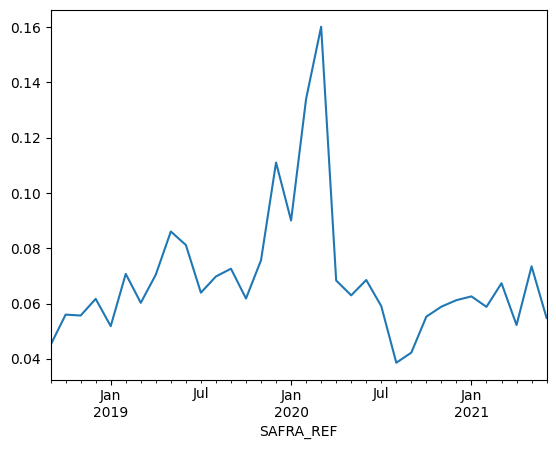

In [ ]:
base_completa.groupby('SAFRA_REF')['FLAG_MAU'].mean().sort_index().plot.line()

A base apresenta uma um pico de inadimplência nos três primeiros meses de 2020.

## Inadimplência por Segmento Industrial

<Axes: xlabel='SEGMENTO_INDUSTRIAL'>

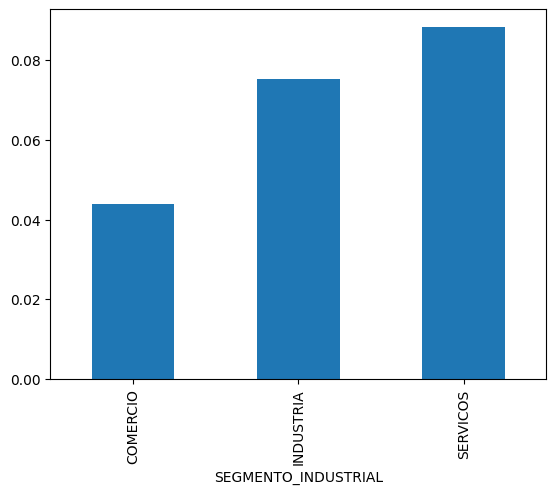

In [ ]:
base_completa.groupby('SEGMENTO_INDUSTRIAL')['FLAG_MAU'].mean().sort_values().plot.bar()

O segmento de Serviços possui um maior percentual de inadimplência.

## Inadimplência por Domínio de Email

<Axes: ylabel='DOMINIO_EMAIL'>

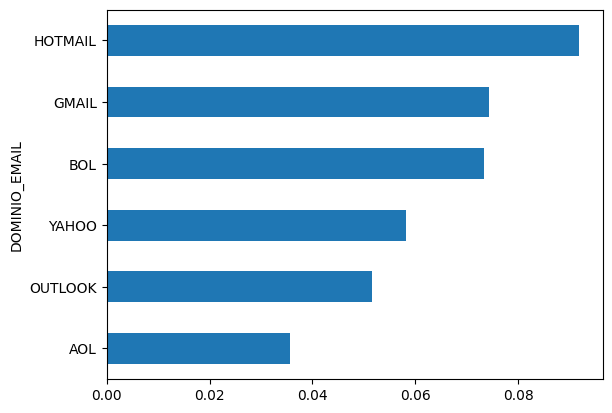

In [ ]:
base_completa.groupby('DOMINIO_EMAIL')['FLAG_MAU'].mean().sort_values().plot.barh()

O domínio de email HOTMAIL possui maior inadimplência.

## Inadimplência por Porte

<Axes: ylabel='PORTE'>

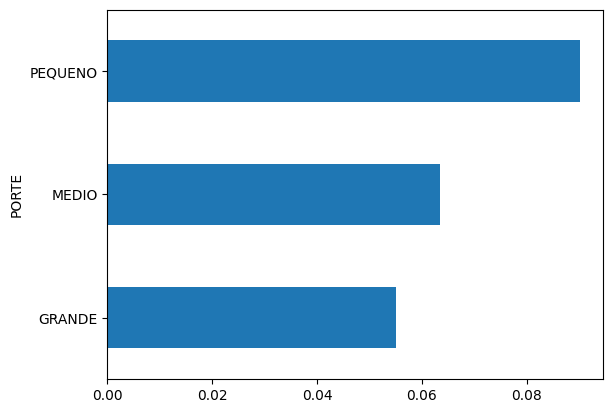

In [ ]:
base_completa.groupby('PORTE')['FLAG_MAU'].mean().sort_values().plot.barh()

Empresas de pequeno porte apresentam uma maior inadimplência.

# Função de Criação e Ajuste de Variáveis

Vamos criar uma função para encapsular todo o código desenvolvido até então de criação de variáveis e correção de tipos.

In [ ]:
import re


def check_2dig(x: str):
  if x and re.match(r"^[0-9]{2}$", x):
    return x
  else:
    return np.nan


def cria_variaveis_e_ajusta(df):

    df = df.copy()

    # Criação de Variáveis
    df['RZ_RENDA_FUNC'] = df[['RENDA_MES_ANTERIOR','NO_FUNCIONARIOS']].apply(lambda x: x[0]/x[1] if x[1]> 0 else np.nan, axis=1)
    df['VL_TAXA'] = df[['TAXA','VALOR_A_PAGAR']].apply(lambda x: (x[0]/100)*x[1] if x[1]> 0 else np.nan, axis=1)

    # Ajustes de Variáveis
    df['DDD'] = df['DDD'].astype(str).apply(check_2dig)
    df['SEGMENTO_INDUSTRIAL'] = df['SEGMENTO_INDUSTRIAL'].astype(str).map({'Serviços':'SERVICOS','Comércio':'COMERCIO','Indústria':'INDUSTRIA'})
    df['DOMINIO_EMAIL'] = df['DOMINIO_EMAIL'].astype(str).map({'YAHOO':'YAHOO','HOTMAIL':'HOTMAIL','OUTLOOK':'OUTLOOK','GMAIL':'GMAIL','BOL':'BOL','AOL':'AOL'})
    df['PORTE'] = df['PORTE'].astype(str).map({'PEQUENO':'PEQUENO','MEDIO':'MEDIO','GRANDE':'GRANDE'})
    df['CEP_2_DIG'] = df['CEP_2_DIG'].astype(str).apply(check_2dig)

    # Preenchimento de nulos nas variáveis categóricas
    variaveis_categoricas =  ['DDD', 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG']

    df[variaveis_categoricas] = df[variaveis_categoricas].fillna('MISSING')
    return df

Agora vamos aplicar a função criada, com o intuito de replicar todos os passos que foram feitos até então:

In [ ]:
base_completa = (
    # Cruzamento das bases
    base_pagamentos
    .merge(base_cadastral, on=['ID_CLIENTE'])
    .merge(base_info, on=['ID_CLIENTE', 'SAFRA_REF'])

    # Remove as amostras que são pessoas físicas
    .query('FLAG_PF.isna()')

    # Cria e ajusta as variáveis
    .pipe(cria_variaveis_e_ajusta)

    # Cria a variável target
    .assign(
        DIAS_DE_ATRASO = lambda df_: (df_['DATA_PAGAMENTO'] - df_['DATA_VENCIMENTO']).dt.days,
        FLAG_MAU = lambda df_: (df_['DIAS_DE_ATRASO']>=5).astype(int)
    )
)

In [ ]:
base_completa

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,...,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DATA_CADASTRO_ANOMES,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,RZ_RENDA_FUNC,VL_TAXA,DIAS_DE_ATRASO,FLAG_MAU
0,1661240395903230676,2018-09,2018-09-16,2018-10-09,2018-10-08,22427.25,5.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,16913.0,92.0,183.836957,1343.392275,1,0
1,1661240395903230676,2018-09,2018-09-23,2018-10-15,2018-10-15,35608.11,5.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,16913.0,92.0,183.836957,2132.925789,0,0
2,1661240395903230676,2018-10,2018-10-08,2018-10-30,2018-10-29,17988.49,5.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,236447.0,93.0,2542.440860,1077.510551,1,0
3,1661240395903230676,2018-10,2018-10-17,2018-11-07,2018-11-06,41998.20,6.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,236447.0,93.0,2542.440860,2935.674180,1,0
4,1661240395903230676,2018-10,2018-10-21,2018-11-12,2018-11-12,35514.41,6.99,2013-08-22,99,NaN,...,YAHOO,PEQUENO,65,2013-08,236447.0,93.0,2542.440860,2482.457259,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73472,3148228961195376491,2021-06,2021-06-13,2021-07-26,2021-07-28,17302.05,4.99,2015-12-13,MISSING,NaN,...,BOL,MEDIO,36,2015-12,343507.0,134.0,2563.485075,863.372295,-2,0
73473,2439954154030259398,2021-06,2021-06-14,2021-06-28,2021-06-29,19799.30,6.99,2019-07-02,MISSING,NaN,...,BOL,PEQUENO,13,2019-07,392975.0,121.0,3247.727273,1383.971070,-1,0
73474,2439954154030259398,2021-06,2021-06-17,2021-07-01,2021-07-02,19913.15,11.99,2019-07-02,MISSING,NaN,...,BOL,PEQUENO,13,2019-07,392975.0,121.0,3247.727273,2387.586685,-1,0
73475,4799794458216343260,2021-06,2021-06-14,2021-07-13,2021-07-09,2806.09,6.99,2019-12-30,19,NaN,...,OUTLOOK,MEDIO,20,2019-12,70449.0,141.0,499.638298,196.145691,4,0


# Treinamento dos Modelos

## Variáveis Preditivas

In [40]:
variaveis_numericas = ['VALOR_A_PAGAR', 'TAXA', 'RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS', 'RZ_RENDA_FUNC', 'VL_TAXA']
variaveis_categoricas = ['DDD', 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG']

features = variaveis_numericas + variaveis_categoricas
features

['VALOR_A_PAGAR',
 'TAXA',
 'RENDA_MES_ANTERIOR',
 'NO_FUNCIONARIOS',
 'RZ_RENDA_FUNC',
 'VL_TAXA',
 'DDD',
 'SEGMENTO_INDUSTRIAL',
 'DOMINIO_EMAIL',
 'PORTE',
 'CEP_2_DIG']

In [41]:
target = 'FLAG_MAU'

In [42]:
ignore_cols = [col for col in base_completa.columns if col not in features + [target]]
ignore_cols

['ID_CLIENTE',
 'SAFRA_REF',
 'DATA_EMISSAO_DOCUMENTO',
 'DATA_PAGAMENTO',
 'DATA_VENCIMENTO',
 'DATA_CADASTRO',
 'FLAG_PF',
 'DATA_CADASTRO_ANOMES',
 'RAZAO_RENDA_FUNC']

## Divisão da Base

Iremos dividir a base em 3 partes:

1. Base de treino: será utilizada para treinar todos os algoritmos que serão utilizados.
2. Base de validação: será utilizada para avaliar todos os algoritmos treinados e escolher o modelo campeão
3. Base Out of Time: será utilizada para avaliar a performanace e estabilidade do modelo campeão

In [ ]:
from sklearn.model_selection import train_test_split

df_train = base_completa[base_completa['SAFRA_REF']<'2021-03'].copy()

df_train, df_val = train_test_split(df_train, test_size=0.20)

df_oot = base_completa[base_completa['SAFRA_REF']>='2021-03'].copy()

In [ ]:
df_train.shape

(51178, 21)

In [ ]:
df_val.shape

(12795, 21)

In [ ]:
df_oot.shape

(9348, 21)

## Preparando a Base para os Modelos

Vamos fazer imputação de valores faltantes e criação de variáveis dummies para as colunas categóricas.

A principal ideia aqui é a seguinte:

1. Calculamos tudo na base de treino, e
2. Apenas aplicamos nas bases de validação e out of time

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.5 MB/s eta 0:00:00


#### Imputação de Valores Faltantes nas Variáveis Numéricas

In [ ]:
from feature_engine.imputation import MeanMedianImputer

mean_imputer = MeanMedianImputer(variables=variaveis_numericas, imputation_method='mean')

df_train = mean_imputer.fit_transform(df_train)
df_val = mean_imputer.transform(df_val)
df_oot = mean_imputer.transform(df_oot)

### Imputação de Valores Faltantes nas Variáveis Categóricas

In [ ]:
from feature_engine.imputation import CategoricalImputer

missing_imputer = CategoricalImputer(variables=variaveis_categoricas, imputation_method='missing')

df_train = missing_imputer.fit_transform(df_train)
df_val = missing_imputer.transform(df_val)
df_oot = missing_imputer.transform(df_oot)

### Criação de Variáveis Dummies (One Hot Encoder)

In [ ]:
from feature_engine.encoding import OneHotEncoder

dummy_imputer = OneHotEncoder(variables=variaveis_categoricas, top_categories=10)

df_train = dummy_imputer.fit_transform(df_train)
df_val = dummy_imputer.transform(df_val)
df_oot = dummy_imputer.transform(df_oot)

### Selecionando Apenas as Features e Targets

In [ ]:
X_train = df_train.drop(columns=ignore_cols + [target])
X_val = df_val.drop(columns=ignore_cols + [target])
X_oot = df_oot.drop(columns=ignore_cols + [target])

In [ ]:
y_train = df_train[target]
y_val = df_val[target]
y_oot = df_oot[target]

## Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Avaliando a Performance dos Modelos na Base de Validação

In [ ]:
from sklearn.metrics import roc_auc_score

## Regressão Logística

In [ ]:
lr_y_pred_val = lr.predict_proba(X_val)[:,1]

lr_auc_val = roc_auc_score(y_val, lr_y_pred_val)
lr_auc_val

0.6728460444829996

## Árvore de Decisão

In [ ]:
dt_y_pred_val = dt.predict_proba(X_val)[:,1]

dt_auc_val = roc_auc_score(y_val, dt_y_pred_val)
dt_auc_val

0.7644763488276826

## XGBoost

In [ ]:
xgb_y_pred_val = xgb.predict_proba(X_val)[:,1]

xgb_auc_val = roc_auc_score(y_val, xgb_y_pred_val)
xgb_auc_val

0.9198514181064603

## Escolha do Melhor Modelo

Dos resultados calculados acima, o melhor modelo é o xgboost, com uma auc de 0.919172

# Avaliando a Performance do Melhor Modelo na Base Out of Time

In [ ]:
y_pred_oot = xgb.predict_proba(X_oot)[:,1]

xgb_auc_oot = roc_auc_score(y_oot, y_pred_oot)
xgb_auc_oot

0.8307372616725397

In [ ]:
roc_auc_by_safra = (X_oot
 .assign(
      flag_mau  = y_oot,
      safra_ref = df_oot['SAFRA_REF'],
      predictions = xgb.predict_proba(X_oot)[:,1]
 )
 .groupby('safra_ref')
 .apply(lambda df_: roc_auc_score(df_['flag_mau'], df_['predictions']))
)

In [ ]:
roc_auc_by_safra

safra_ref
2021-03    0.869498
2021-04    0.844240
2021-05    0.791761
2021-06    0.826116
Freq: M, dtype: float64

<Axes: xlabel='safra_ref'>

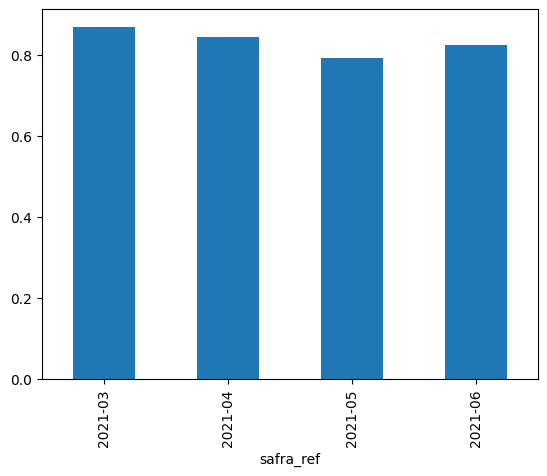

In [ ]:
roc_auc_by_safra.plot.bar()

# Variáveis Importantes

<Axes: >

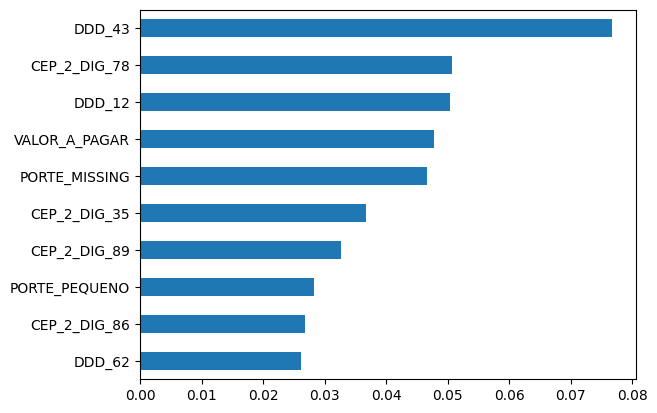

In [ ]:
importances = xgb.feature_importances_
names = xgb.feature_names_in_

varimp = pd.Series(importances, index=names).sort_values().tail(10).plot.barh()
varimp